# 1 K-means Clustering

## 1.1 implementing K-means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
import seaborn as sb

In [2]:
# 给每个x^(i)分配它的centroid
def find_closest_centroids(X, centroids):
    # X 维度 m , n
    # centroids 维度 k, n
    m = X.shape[0]
    k = centroids.shape[0]
    indices = np.zeros(m)

    for i in range(m):
        min_dis = 100000000                                  #这个选择大一点的数接近inf,不然会分类错误
        for j in range(k):
            dis = np.sum(np.power(X[i, :] - centroids[j, :], 2))
            if dis < min_dis:
                min_dis = dis  
                indices[i] = j
                
        
    return indices

In [3]:
# 测试函数的正确
k_means_data = loadmat('data/ex7data2.mat')
X = k_means_data['X']
print(X[:3])

initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, initial_centroids)
idx[:3]

[[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]]


array([0., 2., 1.])

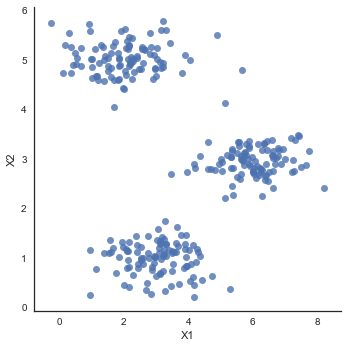

In [4]:
# plt.figure(figsize=(8, 6))
# plt.scatter(X[:, 0], X[:, 1])
# plt.show()
#两种方式均可
X = pd.DataFrame(X, columns=['X1', 'X2'])
sb.set(context='notebook', style='white')
sb.lmplot('X1', 'X2', data=X, fit_reg=False)
plt.show()

## 1.2 Computing centroids means

In [5]:
def compute_centroids(X, indices, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        index = np.where(indices == i)                          #返回一个tuple，第一列为,indices 中等于i的下标组成的数组，此条件下为一维数组
        num = len(index[0])                                        #如果直接对index求len会返回1
#         print(X[index[0], :].shape)                                
        centroids[i, :] = np.sum(X[index[0], :], axis=0) / num  
        #axis=0按照第一维度的方向求和， 当然也可以不用压缩，直接按照第二维度求和之后再压缩也可以
        
    return centroids

In [6]:
X = np.array(X)                                                   #上面将X转化为了DataFrame
compute_centroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [7]:
def k_mean_run(X, initial_centroids, max_iter):
    k = initial_centroids.shape[0]
    centroids = initial_centroids
    record_centroids = []
    record_centroids.append(initial_centroids)
    
    for i in range(max_iter):
        indices = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, indices, k)
        record_centroids.append(centroids)
    
    return indices, centroids, record_centroids

In [8]:
index, centroids, record_centroids = k_mean_run(X, initial_centroids, 10)

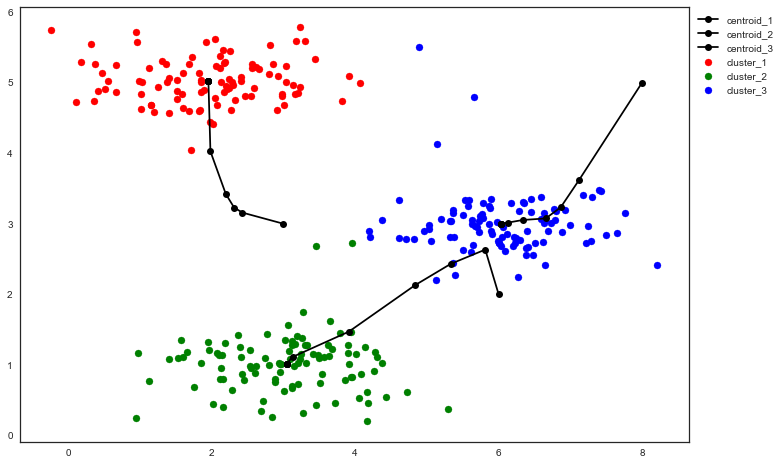

In [9]:
record_centroids = np.array(record_centroids)
centroids1 = record_centroids[:, 0, :]
centroids2 = record_centroids[:, 1, :]
centroids3 = record_centroids[:, 2, :]

cluster1 = X[index == 0, :]
cluster2 = X[index == 1, :]
cluster3 = X[index == 2, :]

plt.figure(figsize=(12, 8))
plt.scatter(cluster1[:, 0], cluster1[:, 1], c='r', label='cluster_1')
plt.scatter(cluster2[:, 0], cluster2[:, 1], c='g', label='cluster_2')
plt.scatter(cluster3[:, 0], cluster3[:, 1], c='b', label='cluster_3')
plt.plot(centroids1[:, 0], centroids1[:, 1], 'k-o', label='centroid_1')
plt.plot(centroids2[:, 0], centroids2[:, 1], 'k-o', label='centroid_2')
plt.plot(centroids3[:, 0], centroids3[:, 1], 'k-o', label='centroid_3')

plt.legend(bbox_to_anchor=(1, 1)) #相对位置
plt.show()

## 1.3 随机初始化

In [10]:
def random_initialize(X, k):
    m, n = X.shape
    idx = np.random.randint(0, m, k)
    initial_centroids = X[idx, :]
    
    return initial_centroids

In [11]:
random_initialize(X, 3)

array([[5.37052667, 2.44954813],
       [6.17443157, 3.29026488],
       [2.37198785, 1.42789607]])

## 1.4 图像压缩

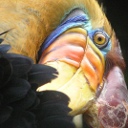

In [12]:
from IPython.display import Image
Image(filename='data/bird_small.png')

In [13]:
image = loadmat('data/bird_small.mat')
image

{'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
         [ 59,  43,  42]],
 
        [[ 15,  19,  19],
         [ 20,  20,  18],
         [ 18,  19,  17],
         ...,
         [ 65,  43,  39

In [14]:
X = A = image['A']
A.shape

(128, 128, 3)

In [15]:
A = A / 255
A = A.reshape(A.shape[0] * A.shape[1], A.shape[2])
A.shape

(16384, 3)

In [16]:
#将原来每个像素由24bit表示压缩为现在的16种颜色,这样表示颜色只需要4bit
initial_centroids = random_initialize(A, 16)

index, centroids, _ = k_mean_run(A, initial_centroids, 10)

index = find_closest_centroids(A, centroids)

#centroids中存放的就是每种颜色和原24bit颜色的对应
print(index.shape, centroids.shape)

(16384,) (16, 3)


(16384, 3)
(128, 128, 3)


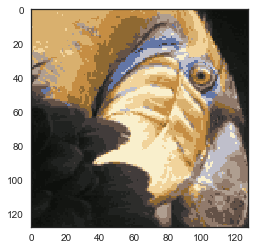

In [17]:
# 下面是将图像压缩后的效果，看的出来还是有点失真的
A_compressed = centroids[index.astype(int), :]            #astype将类型转换为int
print(A_compressed.shape)
A_compressed = A_compressed.reshape((X.shape[0], X.shape[1], X.shape[2]))
print(A_compressed.shape)

plt.imshow(A_compressed)
plt.show()

接下来用scikit-learn工具包实现K-mean

F:\anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


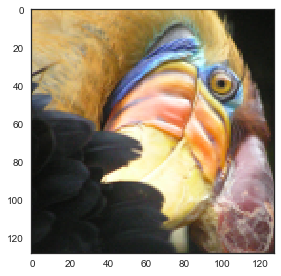

In [18]:
from skimage import io

pic = io.imread('data/bird_small.png') / 255
io.imshow(pic)
plt.show()

In [19]:
pic.shape

(128, 128, 3)

In [20]:
data = pic.reshape(pic.shape[0] * pic.shape[1], pic.shape[2])
data.shape

(16384, 3)

In [21]:
from sklearn.cluster import KMeans

In [22]:
model = KMeans(n_clusters=16, n_init=100, n_jobs=-1) # n_init初始化次数， n_jobs表示同时进行几个初始化运算, -1代表所有的cpus都会使用

model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=100, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
centroids = model.cluster_centers_
centroids.shape

(16, 3)

In [24]:
index = model.predict(data)
index.shape

(16384,)

In [25]:
pic_compressed = centroids[index, :]
pic_compressed = np.reshape(pic_compressed, (128, 128, 3))
pic_compressed.shape

(128, 128, 3)

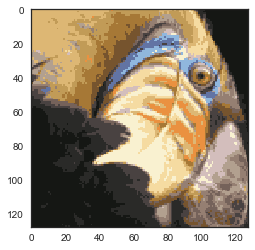

In [26]:
plt.imshow(pic_compressed)
plt.show()

# 2 主成分分析

In [27]:
data = loadmat('data/ex7data1.mat')
data

{'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
        [3.22382902, 4.94255585],
        [4.92948801, 5.95501971],
        [5.79295774, 5.10839305],
        [2.81684824, 4.81895769],
        [

In [28]:
X = data['X']
X.shape

(50, 2)

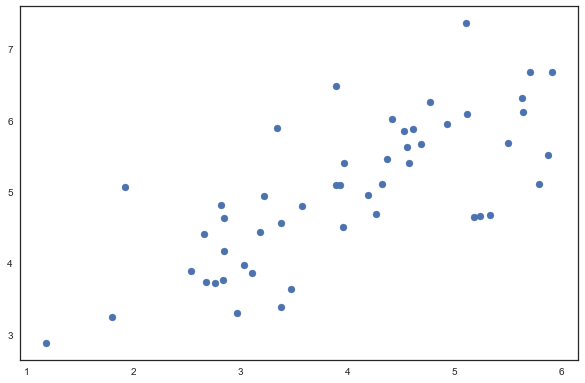

In [29]:
plt.figure(figsize=(10, 6.5))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

在使用PCA之前需要先进行归一化，因为PCA要使用协方差，而协方差的陈述一般只在mean=0的情况下成立

In [30]:
# X = (X - X.mean()) / X.std() #个人认为这里有一点问题,应该对每一列分别求均值和方差
#归一化
X[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [31]:
def pca(X):
    m = X.shape[0]
    
    cov = 1. / m * np.dot(X.T, X)        #协方差n,n
    
    U, S, V = np.linalg.svd(cov)         #协方差矩阵的奇异值分解
    
    return U, S, V

In [32]:
U, S, V = pca(X)
U, S, V

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([1.73553038, 0.26446962]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [33]:
# U矩阵为主要成分，由于要从原来的n映射到k,故 U只选择前面的k列即可
def project(X, U, k):
    #X 为m,n；U为n,n
    mapU = U[:, :k]  #n,k
    return np.dot(X, mapU) #m, k

In [34]:

Z = project(X, U, 1) #将原来的2维变为1维
Z.shape

(50, 1)

In [35]:
#恢复原始数据
def recover(Z, U, k):
    mapU = U[:, :k]  #n,k
    return np.dot(Z, mapU.T)

In [36]:
Xapprox = recover(Z, U, 1)
Xapprox.shape

(50, 2)

从下图可以看出来，前面运算正确，映射到1D上去了，但是感觉还是有点偏差，不知道哪里出了问题

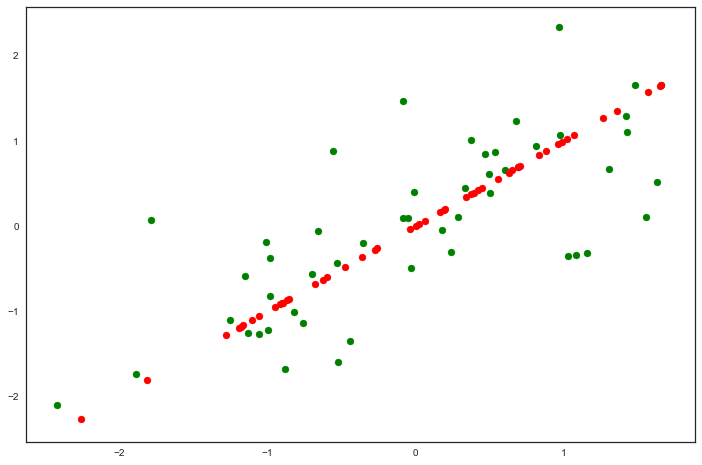

In [37]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c='g')
plt.scatter(Xapprox[:, 0], Xapprox[:, 1], c='r')
plt.show()

## Face Image Dataset

In [38]:
faces = loadmat('data/ex7faces.mat')
faces

{'X': array([[ -37.86631387,  -45.86631387,  -53.86631387, ..., -110.86631387,
         -111.86631387,  -99.86631387],
        [   8.13368613,   -0.86631387,   -8.86631387, ...,  -34.86631387,
           -8.86631387,    0.13368613],
        [ -32.86631387,  -34.86631387,  -36.86631387, ..., -110.86631387,
         -111.86631387, -111.86631387],
        ...,
        [ -46.86631387,  -24.86631387,   -8.86631387, ...,   90.13368613,
           80.13368613,   59.13368613],
        [  19.13368613,   16.13368613,   14.13368613, ...,  -38.86631387,
          -41.86631387,  -46.86631387],
        [-108.86631387, -106.86631387, -102.86631387, ...,   17.13368613,
           17.13368613,   18.13368613]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 23:46:35 2011',
 '__version__': '1.0'}

In [39]:
X = faces['X']
X.shape

(5000, 1024)

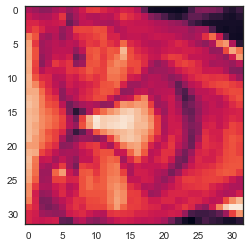

In [40]:
face = X[0, :].reshape(32, 32)
plt.imshow(face)
plt.show()

In [41]:
k = 100
U, S, V = pca(X)
print(U.shape)

Z = project(X, U, k)

(1024, 1024)


In [42]:
Xapprox = recover(Z, U, k)
Xapprox.shape

(5000, 1024)

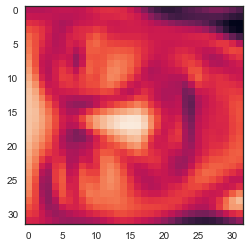

In [43]:
#将原来1024D压缩到100D之后, 明显变模糊了一些
face = Xapprox[0, :].reshape(32, 32)
plt.imshow(face)
plt.show()

In [44]:
def plot_n_pic(X, n):
    
    pic_size = int(np.sqrt(X.shape[1]))
    row = col = int(np.sqrt(n))
    images = X[:n, :]
    
    fig, axes = plt.subplots(nrows=row, ncols=col, sharex=True, sharey=True, figsize=(10, 10))
    for i in range(row):
        for j in range(col):
            axes[i, j].imshow(images[i * col + j].reshape(32, 32))
    
    
#     plt.show()
            

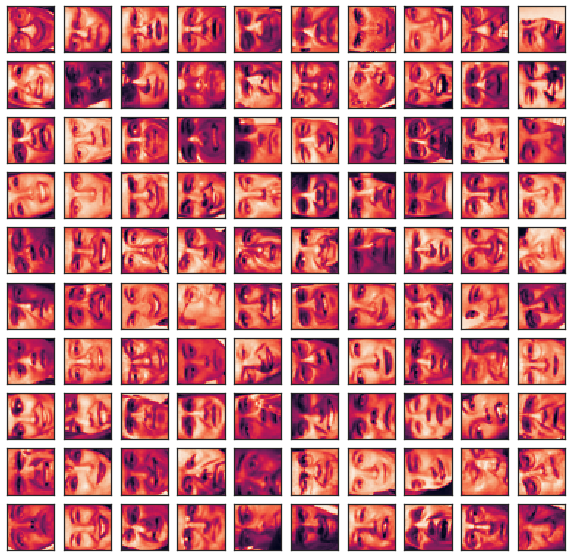

In [45]:
plot_n_pic(X, 100) #取前100张
plt.xticks(list())
plt.yticks(list())
plt.show()